In [2]:
import numpy as np
import matplotlib.pyplot as plt

import math
from IPython.display import clear_output
from scipy.special import factorial

# Linear Regression

In [3]:
mu = 2.5
std = 1.5

x = mu * np.random.randn(100) + std
noise = 0.5 * np.random.randn(100)
y = 2 + 5*x + noise 

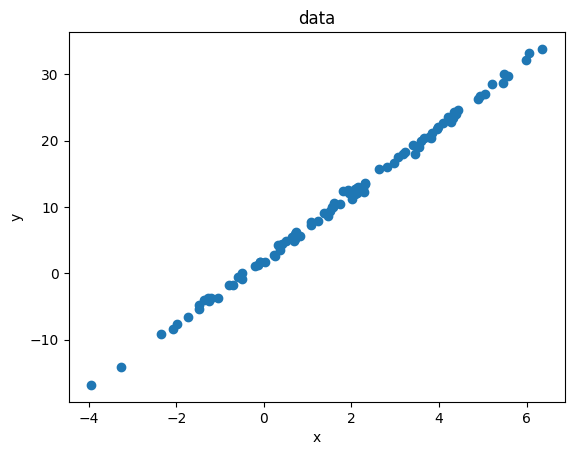

In [6]:
plt.scatter(x,y)
plt.xlabel('x'); plt.ylabel('y'); plt.title('data')
plt.show()

In [14]:
def calculate_loss(y, y_pred):
    N  = len(y)
    loss = np.sum((y - y_pred)**2)/N
    return loss


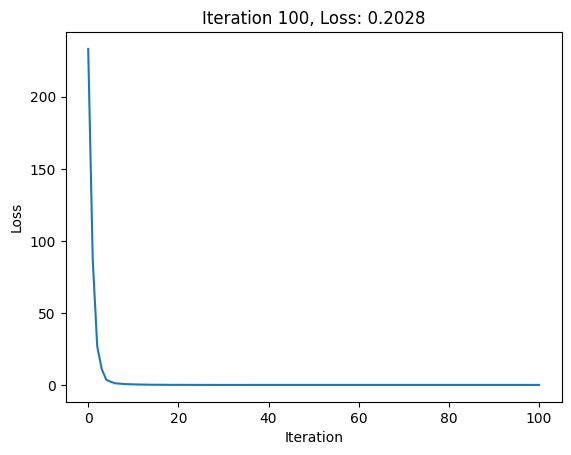

In [58]:
m = 0.1; c = 0.1
# L = 1/N * sum (y - yi)^2
# dL/dm = 2/N * sum( xi * (mxi + c - yi) )
# dL/dc = 2/N * sum( mxi + c - yi)

N = len(x)

loss_arr = []
y_pred = m*x + c
loss_arr.append(calculate_loss(y, y_pred))

learning_rate = 0.1
decay_rate = 0.99
i = 0
while loss_arr[-1] > 0.1 and i < 100:
    m -= (2/N)*learning_rate*np.sum((m*x + c - y)*x)
    c -=  (2/N)*learning_rate*np.sum(m*x + c - y)
    y_pred = m*x + c
    loss_arr.append(calculate_loss(y, y_pred))

    clear_output(wait=True)
    plt.title(f'Iteration {i+1}, Loss: {loss_arr[-1]:.4f}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.plot(loss_arr)
    plt.show()

    i += 1

    learning_rate *= decay_rate
    


    


In [59]:
m,c 

(4.968491448624987, 2.101099189696993)

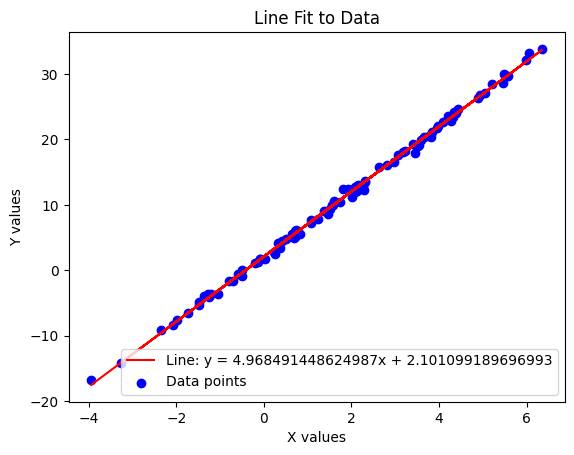

In [60]:
y_pred = m*x + c
plt.plot(x, y_pred, label=f'Line: y = {m}x + {c}', color='red')
plt.scatter(x, y, color='blue', label='Data points')
plt.title('Line Fit to Data');plt.xlabel('X values');plt.ylabel('Y values');plt.legend()
plt.show()

# Logistic Regression

In [62]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

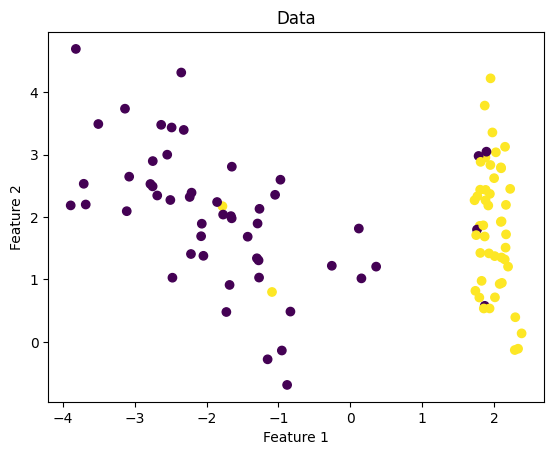

In [65]:
x, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.1, class_sep=2, random_state=0)


plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()


In [78]:
def calculate_logistic_loss(y, y_pred):
    N = len(y)
    loss = -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return (1/N) * np.sum(loss)

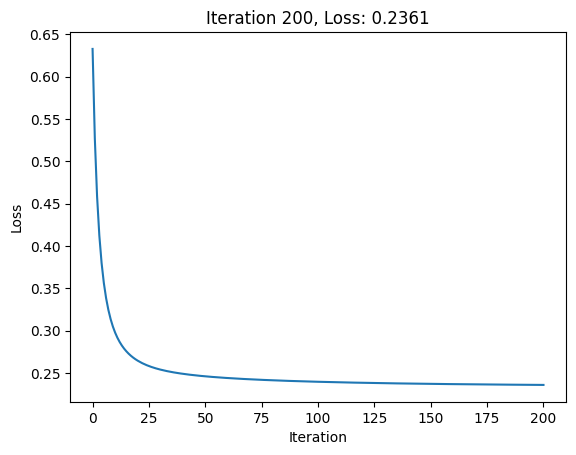

In [83]:
# x is 100 x 2, y is 100 x 1
x1 = x[:,0]; x2 = x[:,1]; N = len(y)
coeff1 = 0.1; coeff2 = 0.1; bias = 0.1

y_pred = 1/(1 + np.exp(-(coeff1*x1 + coeff2*x2 + bias)))
loss = calculate_logistic_loss(y, y_pred)

loss_arr = [loss]

learning_rate = 0.1; decay_rate = 0.99
i = 0
while loss_arr[-1] > 0.1 and i < 200:
    coeff1 -= learning_rate*(1/N)*np.sum( (1/(1 + np.exp(-(coeff1*x1 + coeff2*x2 + bias))) - y)* x1)
    coeff1 -= learning_rate*(1/N)*np.sum( (1/(1 + np.exp(-(coeff1*x1 + coeff2*x2 + bias))) - y)* x1)
    bias -= learning_rate*(1/N)*np.sum( (1/(1 + np.exp(-(coeff1*x1 + coeff2*x2 + bias))) - y))

    y_pred = 1/(1 + np.exp(-(coeff1*x1 + coeff2*x2 + bias)))
    loss_arr.append(calculate_logistic_loss(y, y_pred))

    learning_rate *= decay_rate
    clear_output(wait=True)
    plt.title(f'Iteration {i+1}, Loss: {loss_arr[-1]:.4f}')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.plot(loss_arr)
    plt.show()

    i += 1


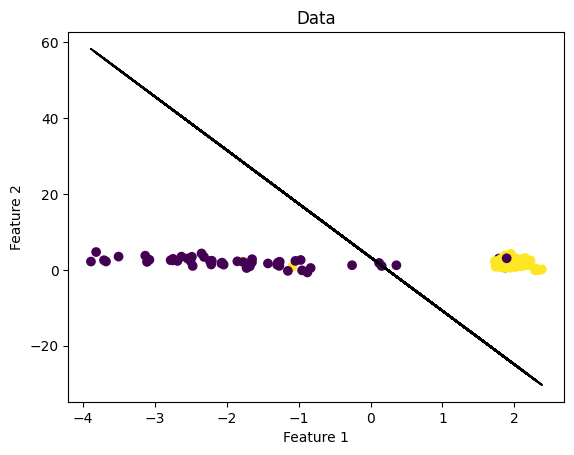

In [84]:
x2_boundary = -(coeff1 / coeff2) * x1 - (bias / coeff2)

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.plot(x1, x2_boundary, 'k--', label='Decision Boundary')


plt.title("Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

# Generalized Linear Model

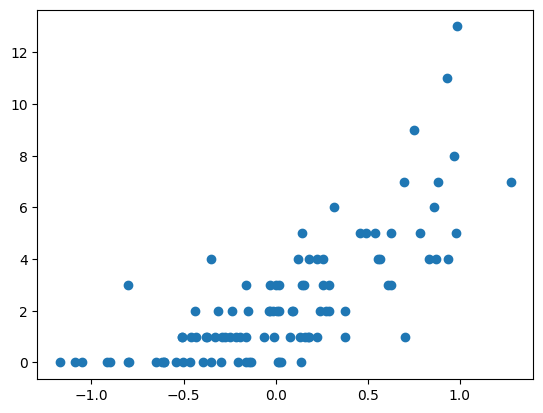

In [168]:
# Generating Data
N = 100
x1 = np.random.randn(N)*0.5


intercept = 0.5
beta1 = 1.5

beta_T_X = intercept + beta1 * x1
# Let's say mean is not picked from beta_T_X but from a exp of that(Say this is an examle where output is Number of people, which has to be positive always. So exponentiate!)
exp_beta_T_X = np.exp(beta_T_X)

# generate data by picking poisson distribution from the above means
y = np.random.poisson(lam=exp_beta_T_X)

plt.scatter(x1, y)
plt.show()

###  1. Here we are assuming poisson distribution(bcoz output is counts(we know this much)):
 General Rule:
  1. Gaussian for continuous data
  2. Poisson for count data
  3. Binomial for binary data
###  2. So, link function will be log
 General Rule:
    1. Logit for binary data
    2. Identity for Gaussian distributions
    3. Log for Poisson distribution

# Loss Function

if p = 1 => -log  p = 0

So loss is neg log likelihood

Loss = -logp1 + -logp2 ... -logpn

p1 = e^-lambda lambda^y / y!

-logp1 = lambda - y log lambda + log k!

Loss = sum(lambda - y log lambda + log k!)





In [173]:
def glm_log_poisson_loss(y, beta_T_x):
    y_pred = np.exp(beta_T_x) 
    # u are assuming that beta_T_x as the mean, and picked from possion distrn where exp(beta_T_x) is mean
    # if that's the case, there is prob of y_actual being in poisson disrn defined by mean exp(beta_T_X)
    # and -log of that prob is the loss(p = 1, loss = 0. If p ~0, loss very high)
    
    loss = y_pred - y*np.log(y_pred + 1e-5) + np.log(factorial(y))
    
    # the above exp was obtained by expanding -log(e ^ -lambda lambda ^ k / k !)
    return np.sum(loss)


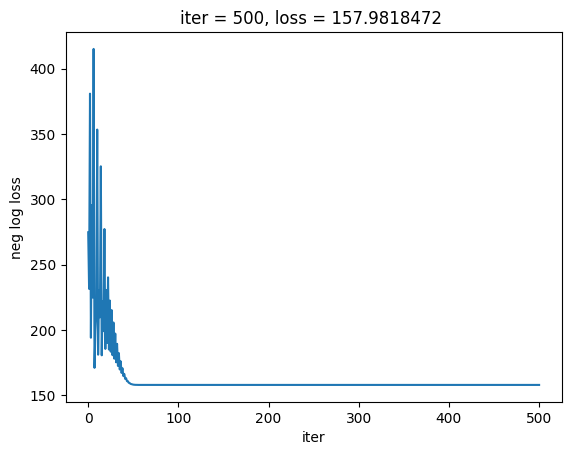

In [180]:
# initialize
coeff1 = 0.1; bias = 0.1

# pred
beta_T_x = coeff1*x1 + bias

# loss
loss = glm_log_poisson_loss(y, beta_T_x)

loss_arr = [ loss ]
N = len(y)

i = 0; learning_rate = 1;  decay_rate = 0.99
while loss_arr[-1] > 0.1 and i < 500:
    # update with current loss
    coeff1 -= learning_rate*(np.sum( x1*np.exp(beta_T_x) - y*x1 ))*(1/N)
    bias -= learning_rate* (np.sum( np.exp(beta_T_x) - y ))*(1/N)

    # see loss with new update
    beta_T_x = coeff1*x1 + bias
    loss = glm_log_poisson_loss(y, beta_T_x)
    loss_arr.append(loss)

    learning_rate *= decay_rate
    i += 1

    
    clear_output(wait=True)
    plt.plot(loss_arr)
    plt.title(f'iter = {i}, loss = {loss:.7f} ')
    plt.xlabel('iter'); plt.ylabel('neg log loss')
    plt.show()


    



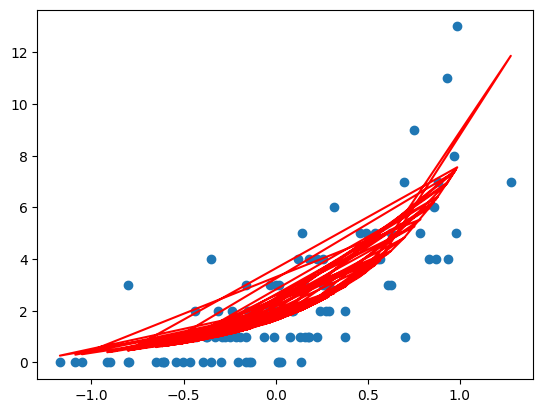

In [186]:
plt.scatter(x1, y)
plt.plot(x1, np.exp(coeff1*x1 + bias), color='red')
plt.show()

In [190]:
coeff1, bias
# beta1 = 1.5; intercept = 0.5

(1.553569442102638, 0.4888359655122452)

# Generalized Linear Mixed-effects Model

In Generalized Linear model, we assumed

link_function(Mu) = beta0 + beta1 * x = beta_T @ X


But in Mixed model, you assume an extra term for each of the random effect = random effect term for each group. If there are n groups, there are n random coeffs/terms

Note that there could be more than one grouping variable.
For example, one group could be school - school1, school2(2 random coeffs)
Another grouping variable could be college - coll1, coll2, coll3 (3 random coeffs)


In a "N" samples data, if you assume there are "r" random effects, then
- there are "r" random coefficients  [r x 1] called gamma
- Each example has "r" design variables. [N x r] called Z

So modified, 
link_function(Mu) =  beta_T @ X  + Z @ gamma =  [ (N x c) @ (c x 1) ] + [ (N x r) @ (r x 1) ] = N x 1 + N x 1

## What to optimize during iters to minize loss
- Beta is optimized obviously, the linear coefficients
- the random coefficients are also optimized

In [91]:
# Generate data
n_groups = 3
n_samples = 100

intercept = 0.5; beta = 1.5;  sigma_random = 0.8

# --- Random effect
# assign each sample to a group
group = np.random.choice(range(n_groups), n_samples) # N x 1. each element is group Number
# random effect for each group
random_effect_for_each_group  = np.random.normal(0, sigma_random, n_groups)

# X
X = np.random.normal(0, 1, n_samples)

# Linear outcome
X_beta_random_effect = intercept + (beta*X) + random_effect_for_each_group[group]
# probability
prob = 1 / (1 + np.exp(-X_beta_random_effect))

# generate Data from binomial distribution
Y = np.random.binomial(1,prob)


In [92]:
# initialize 
beta1 = 0.1; beta0 = 0.1; 
# for random effect, we know there are 10 groups, so 10 random coeffects
gamma = np.ones(n_groups) * 0.1

## Initialize the Z matrix
Z matrix is essential to join the "Group" to its "random effect"

There are 1000 samples, each belongs to one of 10 groups.
Each of the 10 groups has its effects.

Smaller example, there are 3 observation, 2 groups, So two random effects.
You want the first 2 obs. to map to first group(and its random effect) and last obs to the remaining group
So, you have a random effects vector [ r1 r2 ]
If you multiply the [ r1 r2 ] with 
[1 0 
 1 0
 0 1  ] 

a 3 x 2 matrix, you get 

[r1 r1 r2]

So Z is essentially a map from observation to its corresponding group's random effect

In [93]:
Z = np.zeros((n_samples, n_groups))
for i in range(n_samples):
    Z[i, group[i]] = 1

print(Z.shape)

(100, 3)


In [94]:
def glm_binary_loss(y, beta_X_random):
    pred_prob = 1/(1 + np.exp(-beta_X_random))
    N = len(y)
    loss = y*np.log(pred_prob) + (1 - y)*np.log(1 - pred_prob)

    return -(1/N)*np.sum(loss)

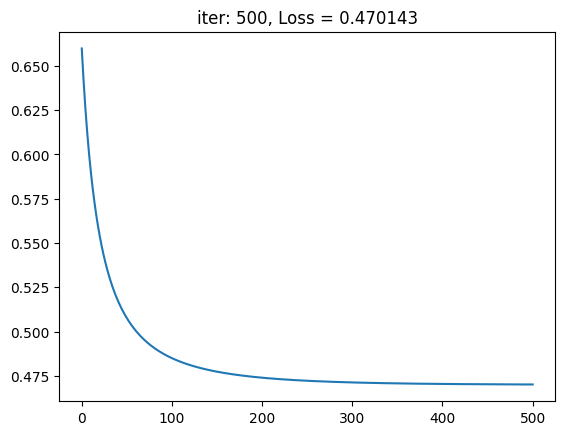

In [95]:
beta_X_random = beta0 + beta1*X + (Z @ gamma)

loss = glm_binary_loss(Y, beta_X_random)
loss_arr = [np.sum(loss)]

i = 0
learning_rate = 0.1; decay_rate = 0.99

while loss_arr[-1] > 0.2 and i < 500:
    beta1 -= learning_rate*(1/n_samples)*np.sum( (1/(1 + np.exp(-(beta_X_random))) - Y)* X)
    beta0 -= learning_rate*(1/n_samples)*np.sum( (1/(1 + np.exp(-(beta_X_random))) - Y))
    # random effect for group i, should only consider dL/dgamma_i for g th group only.
    for r in range(n_groups):
        gamma -= learning_rate*(1/n_samples)*np.sum( (1/(1 + np.exp(-(beta_X_random))) - Y) * Z[:,r]  )
    
    beta_X_random = beta0 + (beta1*X) + (Z @ gamma)
    loss = glm_binary_loss(Y, beta_X_random)
    loss_arr.append(loss)

    i += 1; learning_rate *= decay_rate

    clear_output(wait=True)
    plt.plot(loss_arr)
    plt.title(f'iter: {i}, Loss = {loss:.6f}')
    plt.show()

    


In [98]:
print('beta0: ',beta0,'beta1: ', beta1, 'gamma: ', gamma)
# intercept = 0.5; beta = 1.5
print('diff random eff: ',abs(random_effect_for_each_group - gamma))

beta0:  0.18003176279413882 beta1:  1.3000314682311331 gamma:  [0.18003176 0.18003176 0.18003176]
diff random eff:  [1.12601576 0.41617173 1.05927118]
